# 【案例】图像的数组表示

(1331, 1080, 3) uint8


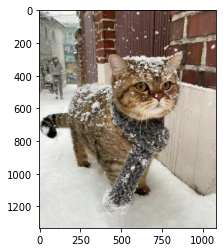

In [8]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
# import pylab
# %matplotlib inline

img = np.array(Image.open(r'D:\Python\PycharmProjects\Project1\jupyter\Numpy\data\cat.jpg'))
plt.imshow(img)
# pylab.show()
print(img.shape, img.dtype)

一个图像是一个三维数组表示的，维度分别是高度、宽度和像素值。而在第三维上面，它的维度是3，也就是由（R，G，B）三个分量上的颜色值共同组合而成当前像素点的像素值，像素值由 uint8 类型来表示，即8位无符号整型数。

## 图像的变换

图像的变换就是对像素点矩阵进行计算。

In [9]:
a = np.array(Image.open(r'data\cat.jpg'))
b = 255 - a
print(b.shape, b.dtype)

(1331, 1080, 3) uint8


对于图像中的每一个由RGB三分量组成的像素点，计算它和255之间的差值。   

**注意**：尽管 255 是一个标量， 和a维度不同，但是利用NumPy的广播机制，前者可以自动扩充成为（1331, 1080, 3）的维度，并且每一个点的值都是（255，255，255）

(1331, 1080, 3) uint8


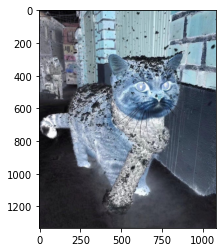

In [10]:
b = b.astype('uint8')
img = Image.fromarray(b) # 将矩阵转成 Image
plt.imshow(img)
print(b.shape, b.dtype)

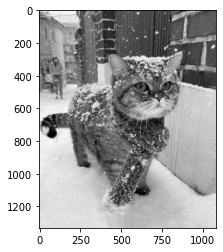

In [13]:
# convert('L')表示将彩色图像转换为一个灰度图像,转换后每一个像素值变成了
# 一个灰度值
a = np.array(Image.open(r'data\cat.jpg').convert("L"))
plt.imshow(a,cmap='gray')

(1331, 1080) uint8


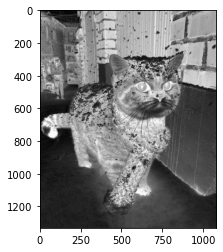

In [30]:
print(a.shape, a.dtype)
b = 255 - a # 对灰度值取反
img = Image.fromarray(b.astype('uint8'))
plt.imshow(img,cmap='gray') 

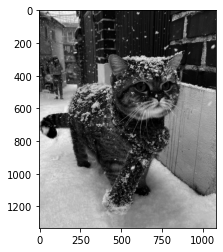

In [14]:
a = np.array(Image.open(r'data\cat.jpg').convert("L"))
c = 255 * (a/255)**2
img = Image.fromarray(c.astype('uint8'))
plt.imshow(img,cmap='gray') 

In [49]:
import PIL
help(PIL.JpegImagePlugin.JpegImageFile.convert)

Help on function convert in module PIL.Image:

convert(self, mode=None, matrix=None, dither=None, palette=0, colors=256)
    Returns a converted copy of this image. For the "P" mode, this
    method translates pixels through the palette.  If mode is
    omitted, a mode is chosen so that all information in the image
    and the palette can be represented without a palette.
    
    The current version supports all possible conversions between
    "L", "RGB" and "CMYK." The ``matrix`` argument only supports "L"
    and "RGB".
    
    When translating a color image to greyscale (mode "L"),
    the library uses the ITU-R 601-2 luma transform::
    
        L = R * 299/1000 + G * 587/1000 + B * 114/1000
    
    The default method of converting a greyscale ("L") or "RGB"
    image into a bilevel (mode "1") image uses Floyd-Steinberg
    dither to approximate the original image luminosity levels. If
    dither is :data:`NONE`, all values larger than 127 are set to 255 (white),
    all other

## 图像的手绘效果

特点：  

1. 黑白灰色图像  
2. 边界线条较重  
3. 相同或相近色彩趋于白色  
4. 略有光源效果

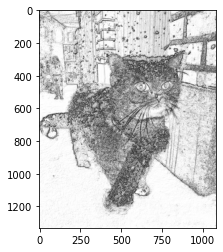

In [15]:
a = np.array(Image.open(r'data\cat.jpg').convert("L")).astype('float')

depth = 10   # 取值（0-100）
grad_x, grad_y = np.gradient(a) # 横纵图像梯度值
grad_x = grad_x * depth/100
grad_y = grad_y * depth/100
A = np.sqrt(grad_x ** 2 + grad_y ** 2 + 1.)
uni_x = grad_x/A
uni_y = grad_y/A
uni_z = 1./A

vec_e1 = np.pi/2.2 # 光源的俯视角度，弧度值
vec_e2 = np.pi/4 # 光源的方位角度，弧度值
dx = np.cos(vec_e1)*np.cos(vec_e2) # 光源对X轴的影响
dy = np.cos(vec_e1)*np.sin(vec_e2) # 光源对y轴的影响
dz = np.sin(vec_e1) # # 光源对z轴的影响

b = 255*(dx*uni_x + dy*uni_y + dz*uni_z) # 光源归一化
b = b.clip(0,255)

img = Image.fromarray(b.astype('uint8')) # 重构图像
plt.imshow(img,cmap='gray')